# Insurance Claim Fraud Detection Project

#### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


#### Independent Variables
1.	months_as_customer: Number of months of patronage   
2.	age: the length of time a customer has lived or a thing has existed   
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer  
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance  
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period   
6.	policy_csl: is basically Combined Single Limit   
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss  
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year  
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies 
10.	insured_zip: It is the zip code where the insurance was made  
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions  
12.	insured_education_level: This refers to the Level of education of the customer  
13.	insured_occupation: This refers Occupation of the customer   
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.   
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership   
16.	capital-gains: This refers to profit accrued due to insurance premium   
17.	capital-loss: This refers to the losses incurred due to insurance claims   
18.	incident_date: This refers to the date which claims where made by customers  
19.	incident_type: This refers to the type of claim/vehicle damage made by customer   
20.	collision_type: This refers to the area of damage on the vehicle   
21.	incident_severity: This refers to the extent/level of damage   
22.	authorities_contacted: This refers to the government agencies that were contacted after damage  
23.	incident_state: This refers to the state at which the accident happened   
24.	incident_city: This refers to the city at which the accident happened   
25.	1ncident_location: This refers to the location at which the accident happened   
26.	incident_hour_of_the_day: The period of the day which accident took place   
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident   
28.	property_damage: This refers to whether property was damaged or not  
29.	bodily_injuries: This refers to injuries sustained   
30.	witnesses: This refers to the number of witnesses involved  
31.	police_report_available: This refers to whether the report on damage was documented or not  
32.	total_claim_amount: This refers to the financial implications involved in claims   
33.	injury_claim: This refers to physical injuries sustained    
34.	property_claim: This refers to property damages during incident   
35.	vehicle_claim: This refers to property damages during incident   
36.	auto_make: This refers to the make of the vehicle   
37.	auto_model: This refers to the model of the vehicle   
38.	auto_year: This refers to the year which the vehicle was manufactured   
39.	_c39:  
40.	fraud_reported  


#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Loading the Dataset and showing first 5 rows

In [2]:
df = pd.read_csv('C:\\Users\\rashm\\Downloads\\Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df.shape

(1000, 40)

This dataset contains 1000 rows and 40 columns

In [4]:
#getting the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation :  
- We can see there are 3 different types of data (int,float and object) present in the dataset.
- Here "fraud_reported" is our target/label which is of object type.

#### Data Integrity Check

In [5]:
df.duplicated().sum()

0

In [6]:
#checking of question mark ("?") inside dataset as we have seen in the file.
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [7]:
#Replacing '?' with np.NaN
df=df.replace('?',np.NaN)

In [8]:
#checking
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

We have Replaced ' ?' with np.NaN

In [9]:
#checking if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

No whitespace, NA, '-' exist in dataset.

In [10]:
# checking for the missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here we can see the count of missing values present in the columns in the dataset

In [11]:
# Droping unnecessary column _c39 as it contains 100% null values.
df.drop(['_c39'],axis=1,inplace=True) 
df.shape

(1000, 39)

In [12]:
# Imputating the Missing values with mode as categorical
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)


In [13]:
# checking again
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

We can see all missing values has been removed from the dataset.

In [14]:
# Checking the Unique Values of Each Column
df.apply(pd.Series.unique)

months_as_customer             [328, 228, 134, 256, 137, 165, 27, 212, 235, 4...
age                            [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...
policy_number                  [521585, 342868, 687698, 227811, 367455, 10459...
policy_bind_date               [17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...
policy_state                                                        [OH, IN, IL]
policy_csl                                          [250/500, 100/300, 500/1000]
policy_deductable                                              [1000, 2000, 500]
policy_annual_premium          [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...
umbrella_limit                 [0, 5000000, 6000000, 4000000, 3000000, 800000...
insured_zip                    [466132, 468176, 430632, 608117, 610706, 47845...
insured_sex                                                       [MALE, FEMALE]
insured_education_level        [MD, PhD, Associate, Masters, High School, Col...
insured_occupation          

In [15]:
# Droping unnecessary columns which are not relevant for prediction
df.drop(['policy_number','insured_zip','policy_bind_date','insured_hobbies','incident_location','incident_date','auto_make','auto_model','auto_year'],axis=1,inplace=True)

In [16]:
df.shape

(1000, 30)

### Seggregating numerical and categorical columns

In [17]:
#Checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns:", cat_col)

Categorical Columns: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'fraud_reported']


In [18]:
#Checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns:\n", num_col)

Numerical Columns:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


## Statistical analysis

In [20]:
#summary of the numerical dataset
df.describe().round(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,203.95,38.95,1136.00,1256.41,1101000.0,25126.10,-26793.7,11.64,1.84,0.99,1.49,52761.94,7433.42,7399.57,37928.95
std,115.11,9.14,611.86,244.17,2297406.6,27872.19,28104.1,6.95,1.02,0.82,1.11,26401.53,4880.95,4824.73,18886.25
min,0.00,19.00,500.00,433.33,-1000000.0,0.00,-111100.0,0.00,1.00,0.00,0.00,100.00,0.00,0.00,70.00
25%,115.75,32.00,500.00,1089.61,0.0,0.00,-51500.0,6.00,1.00,0.00,1.00,41812.50,4295.00,4445.00,30292.50
50%,199.50,38.00,1000.00,1257.20,0.0,0.00,-23250.0,12.00,1.00,1.00,1.00,58055.00,6775.00,6750.00,42100.00
75%,276.25,44.00,2000.00,1415.70,0.0,51025.00,0.0,17.00,3.00,2.00,2.00,70592.50,11305.00,10885.00,50822.50
max,479.00,64.00,2000.00,2047.59,10000000.0,100500.00,0.0,23.00,4.00,2.00,3.00,114920.00,21450.00,23670.00,79560.00


#### Observations:
- People are aged between 19 to 64 with avg age 38.
- By looking at umbrella_limit we can say it has some problem with the data.
- In capital-gains and capital-loss the data seems to have problem. 

## Data Visualization

### Visualization of Categorical columns

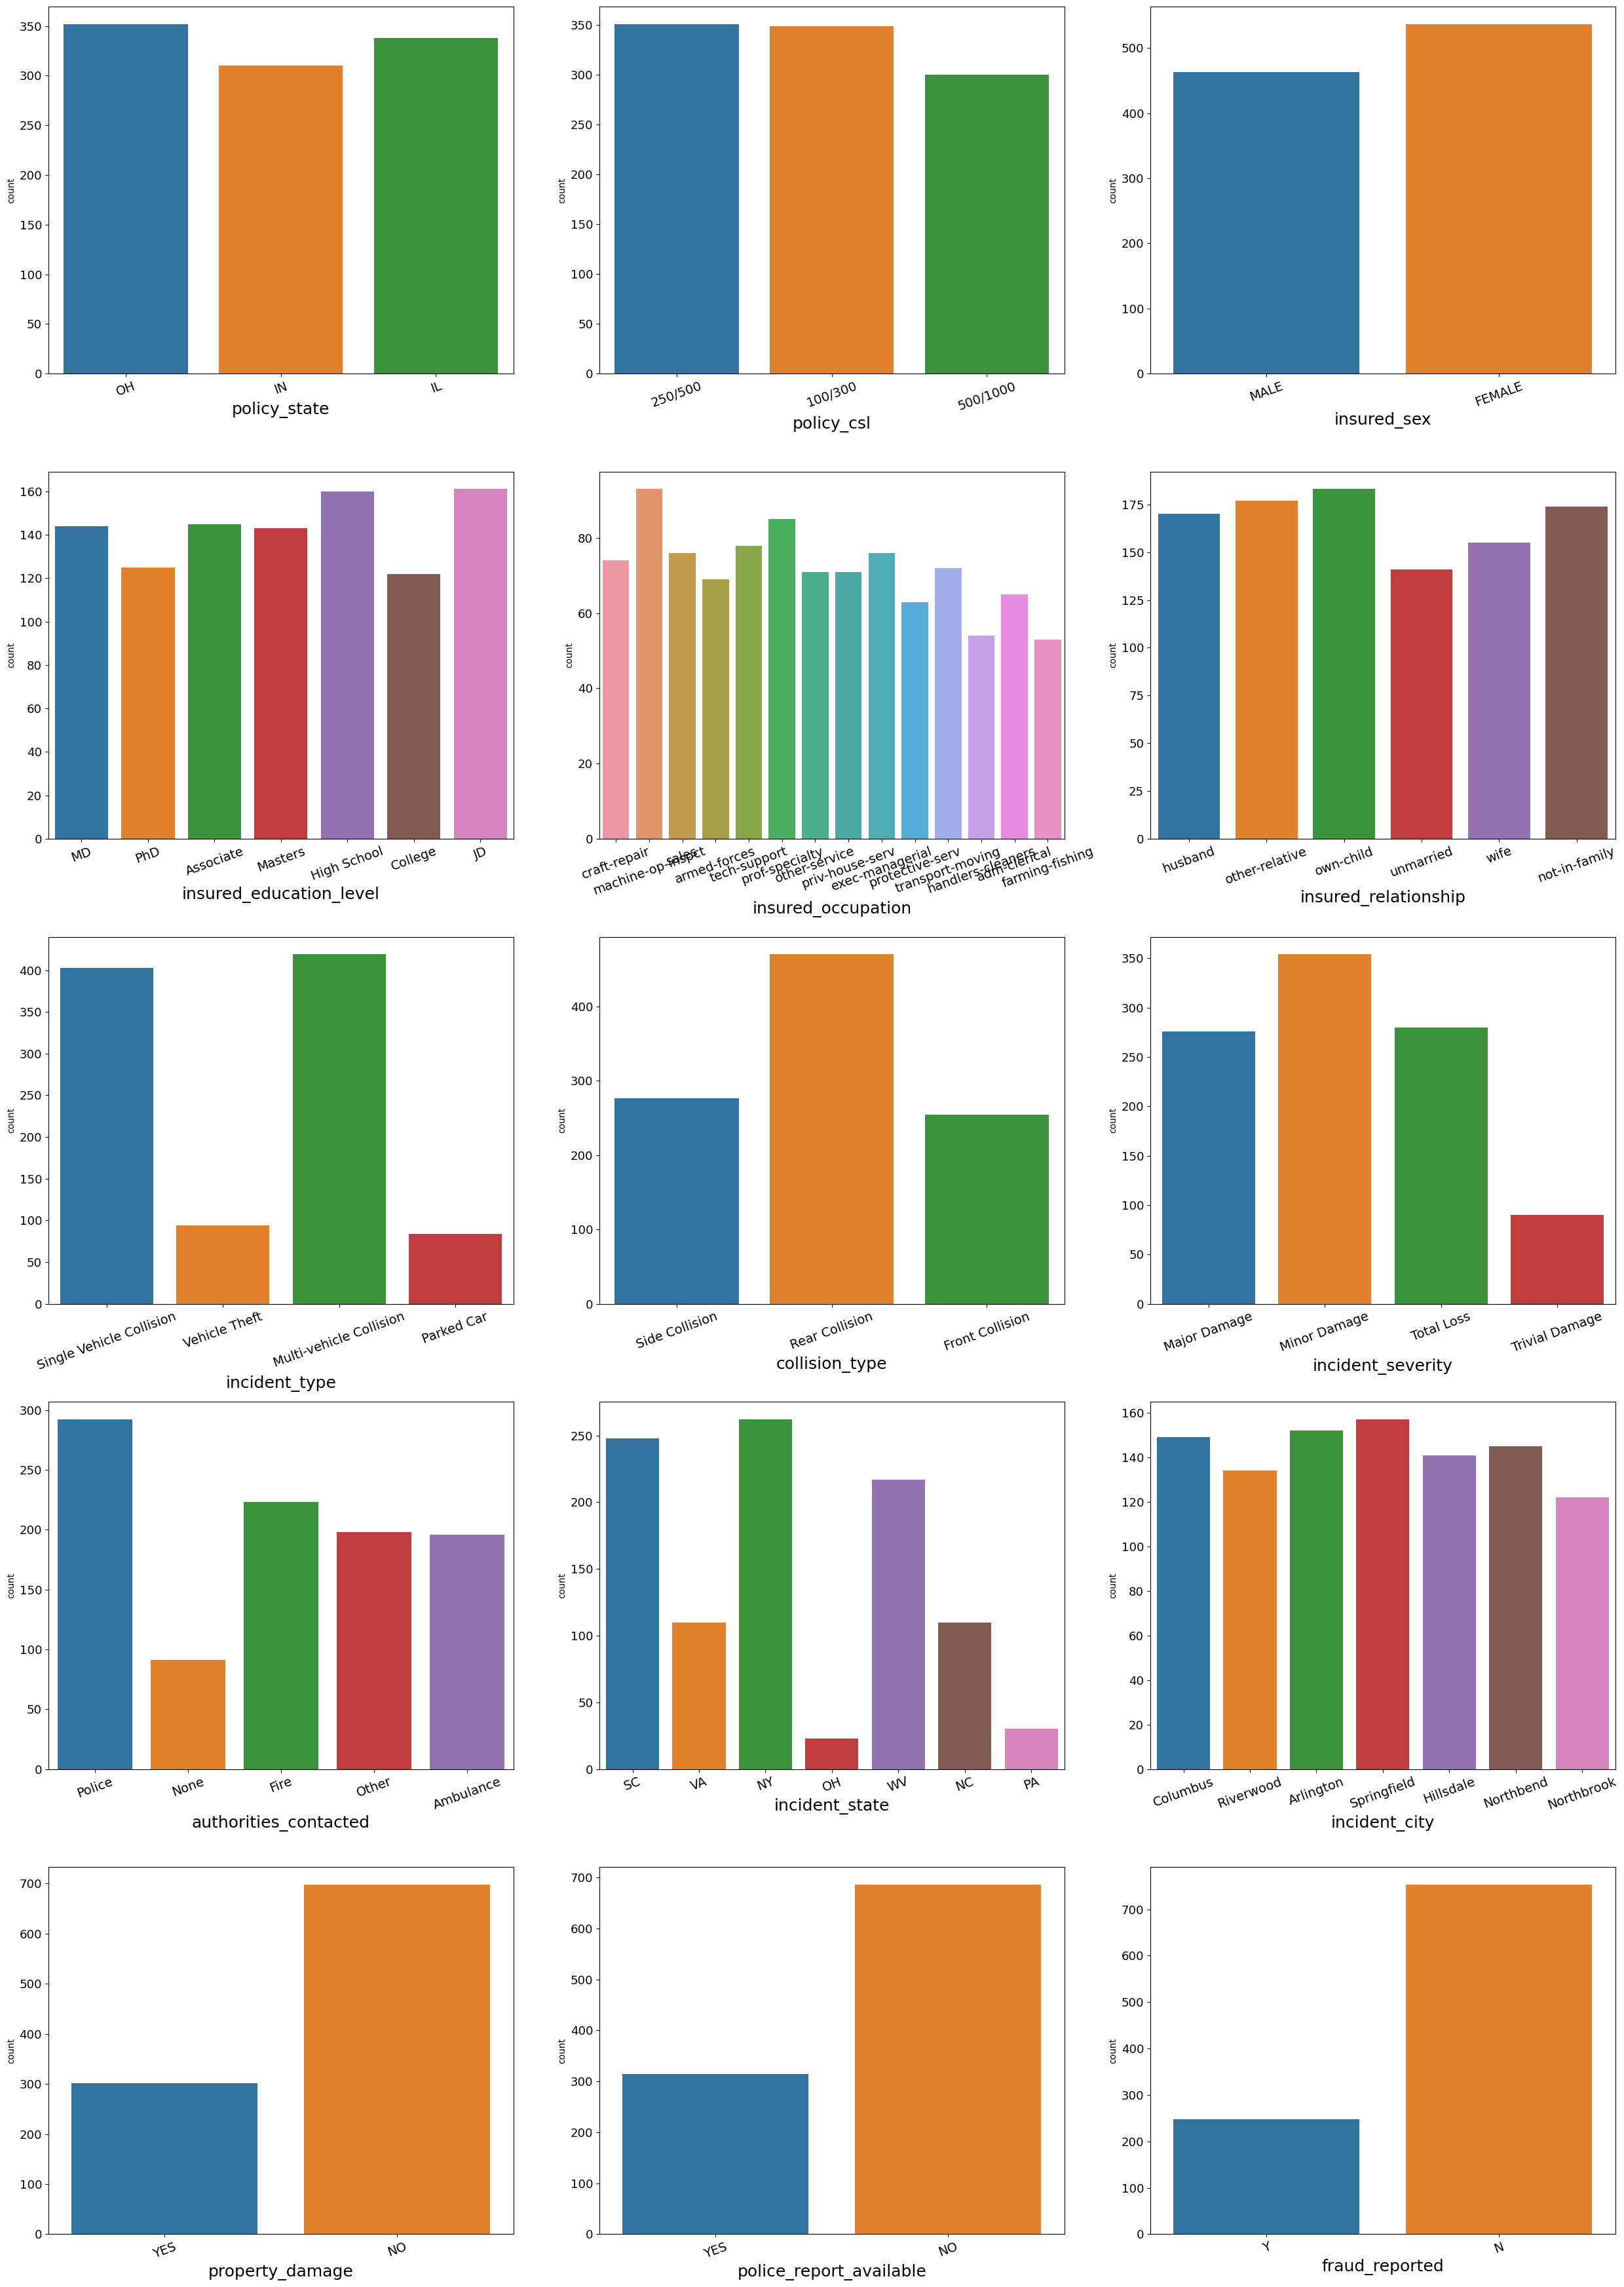

In [22]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=18)
        plt.xticks(fontsize=14,rotation=20)
        plt.yticks(fontsize=13)
    plotnumber+=1
plt.tight_layout()

#### Observations:
- Female are more in numbers than male.
- Different Educational background people have taken insurance.
- In Occupation people from machine-op-inspect have taken highest insurance and handlers-cleaners have taken minimum.
- Poeple having own-child have have highest taken insurance whereas unmarried have lowest value.
- single and multi vehicle collision are more than vehicle theft and parked car.
- rear collision are more in numbers than side and front collision.
- In Incident_severity minor damages has maxm numers while trivial damages has min value.
- The authorities contacted most is police.
- Most of the incident occured in the state NY and least in OH.
- Incidents happened in different cities.
- There are less no of property damages.
- There are less police reports available.
- Fraud reported are minimum in numbers.

### Visualizing the relationship between the features and target

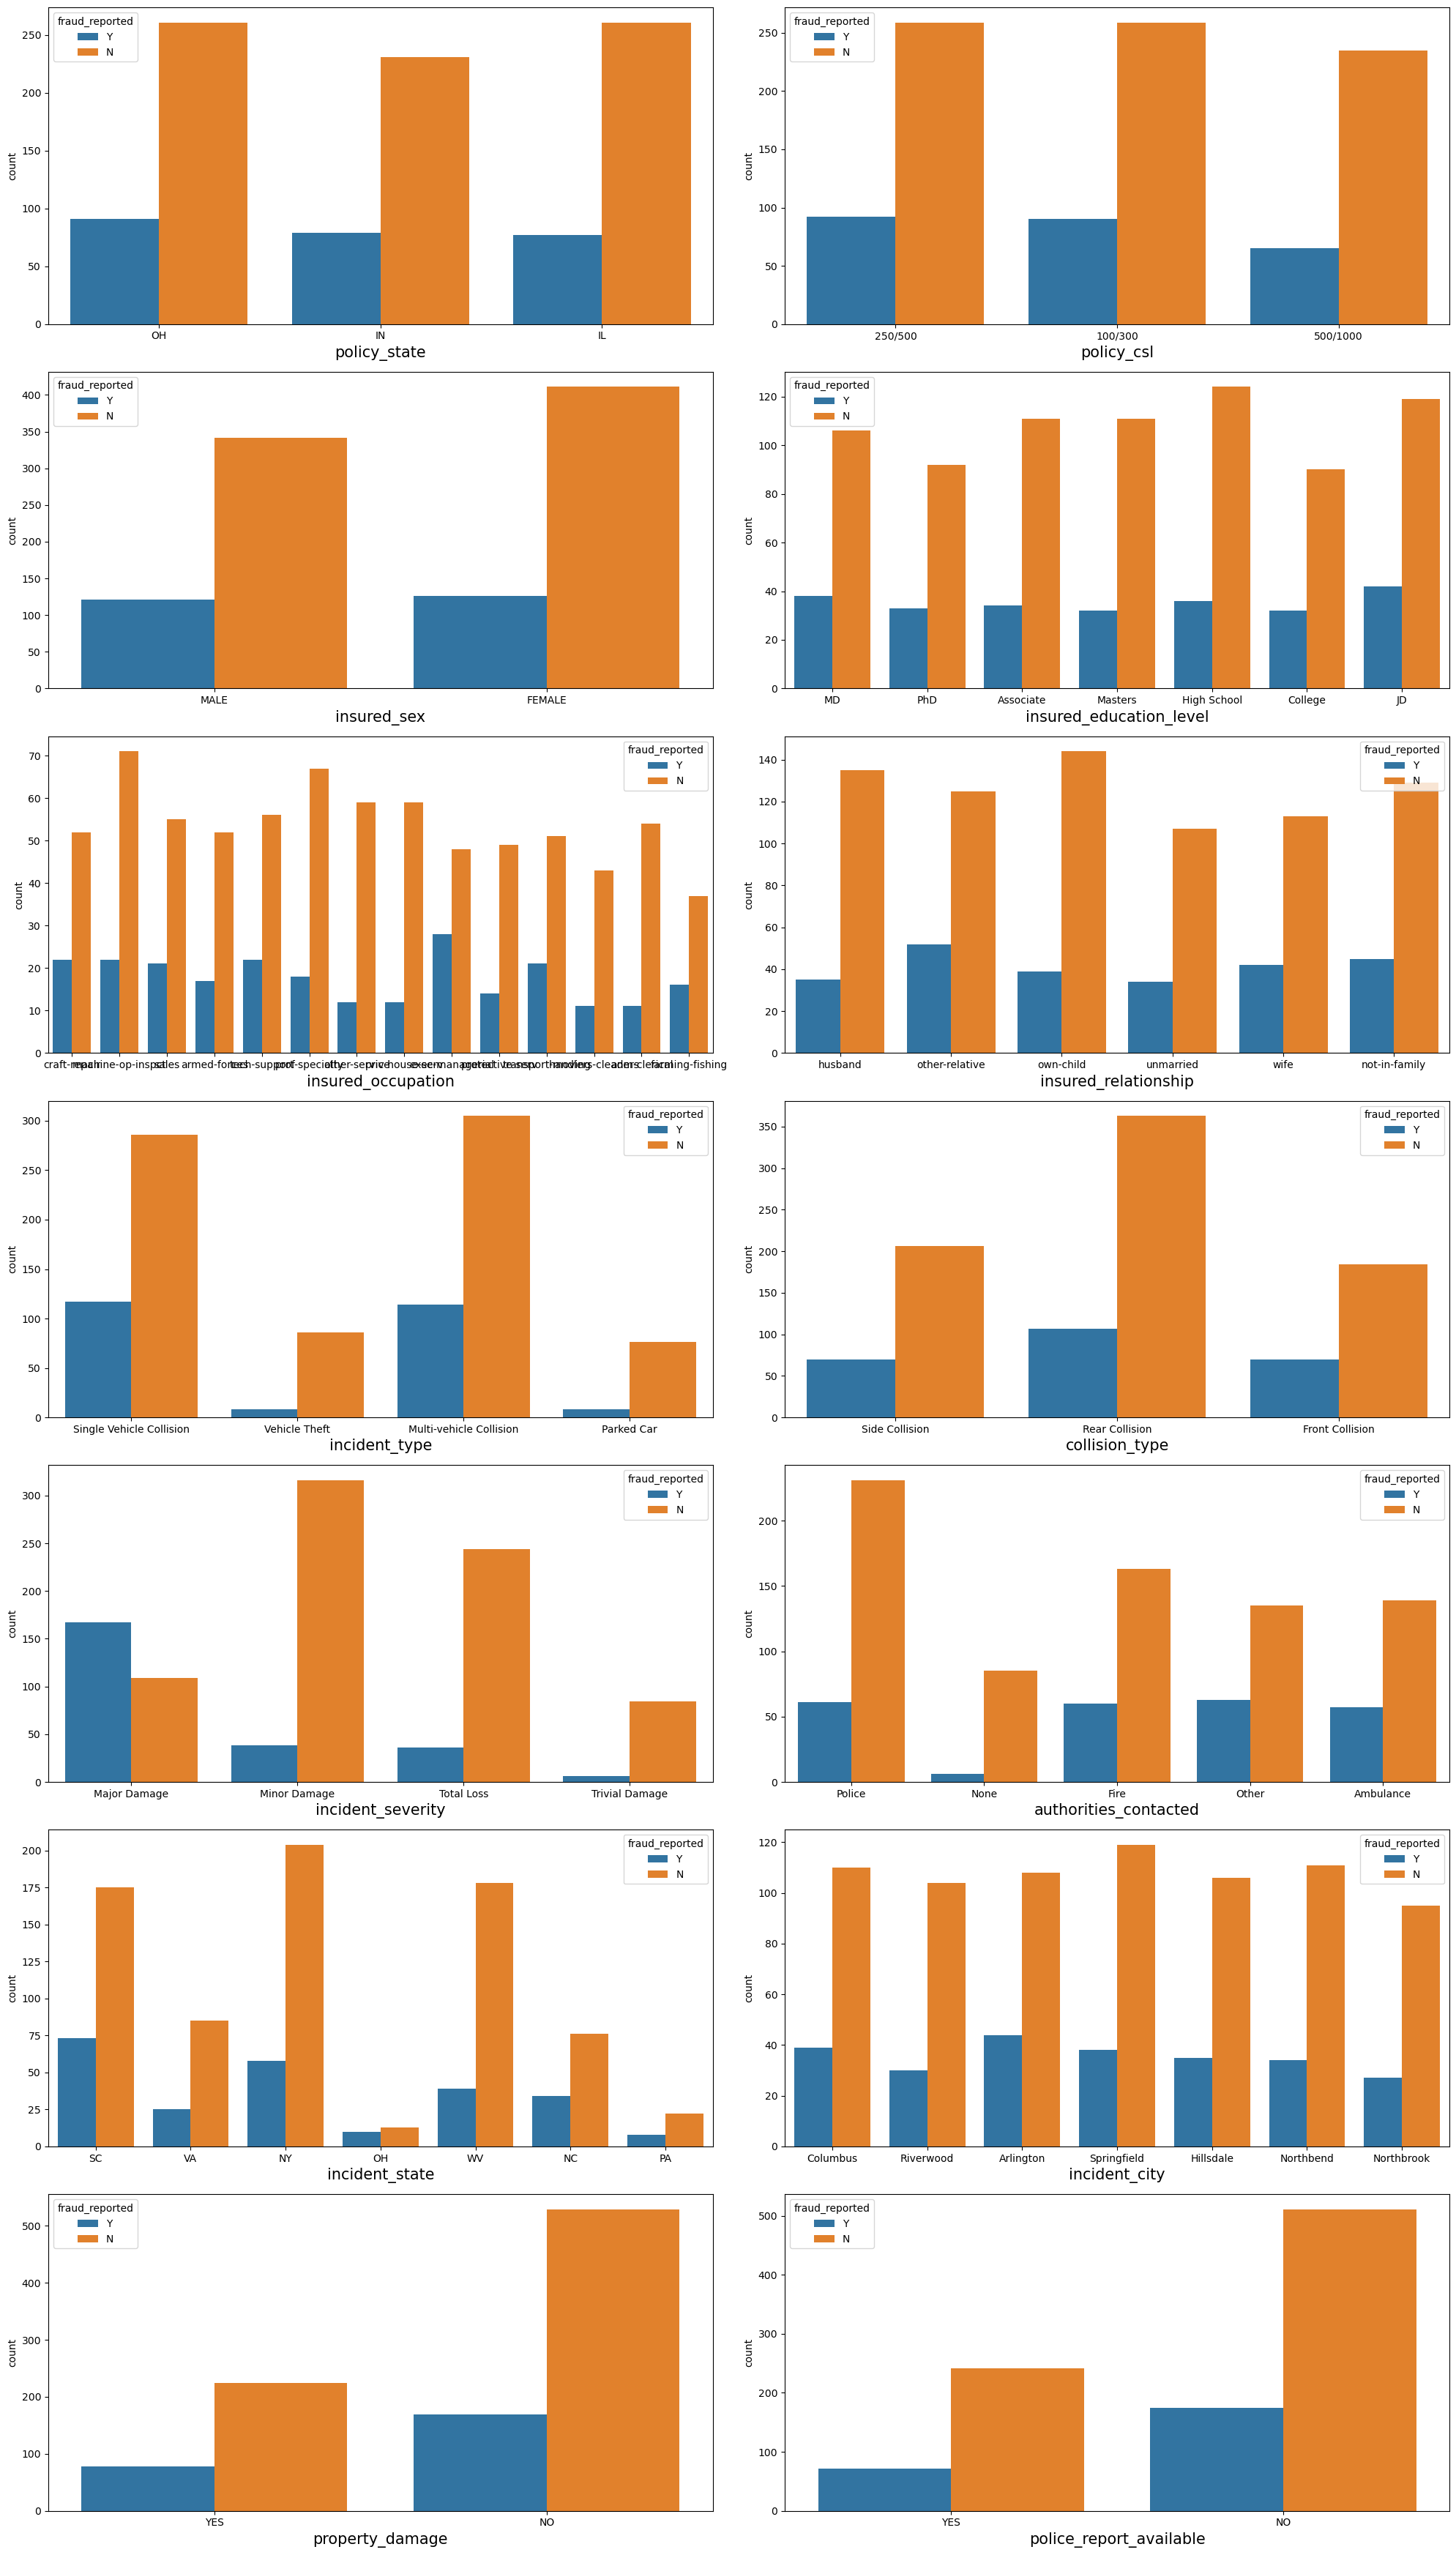

In [24]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber <= 14:
        ax=plt.subplot(7,2,plotnumber)
        sns.countplot(df[column],hue=df["fraud_reported"])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above graphs we can see the count of fraud_reported indifferent types of features.


### Data Distribution Analysis of Numerical columns

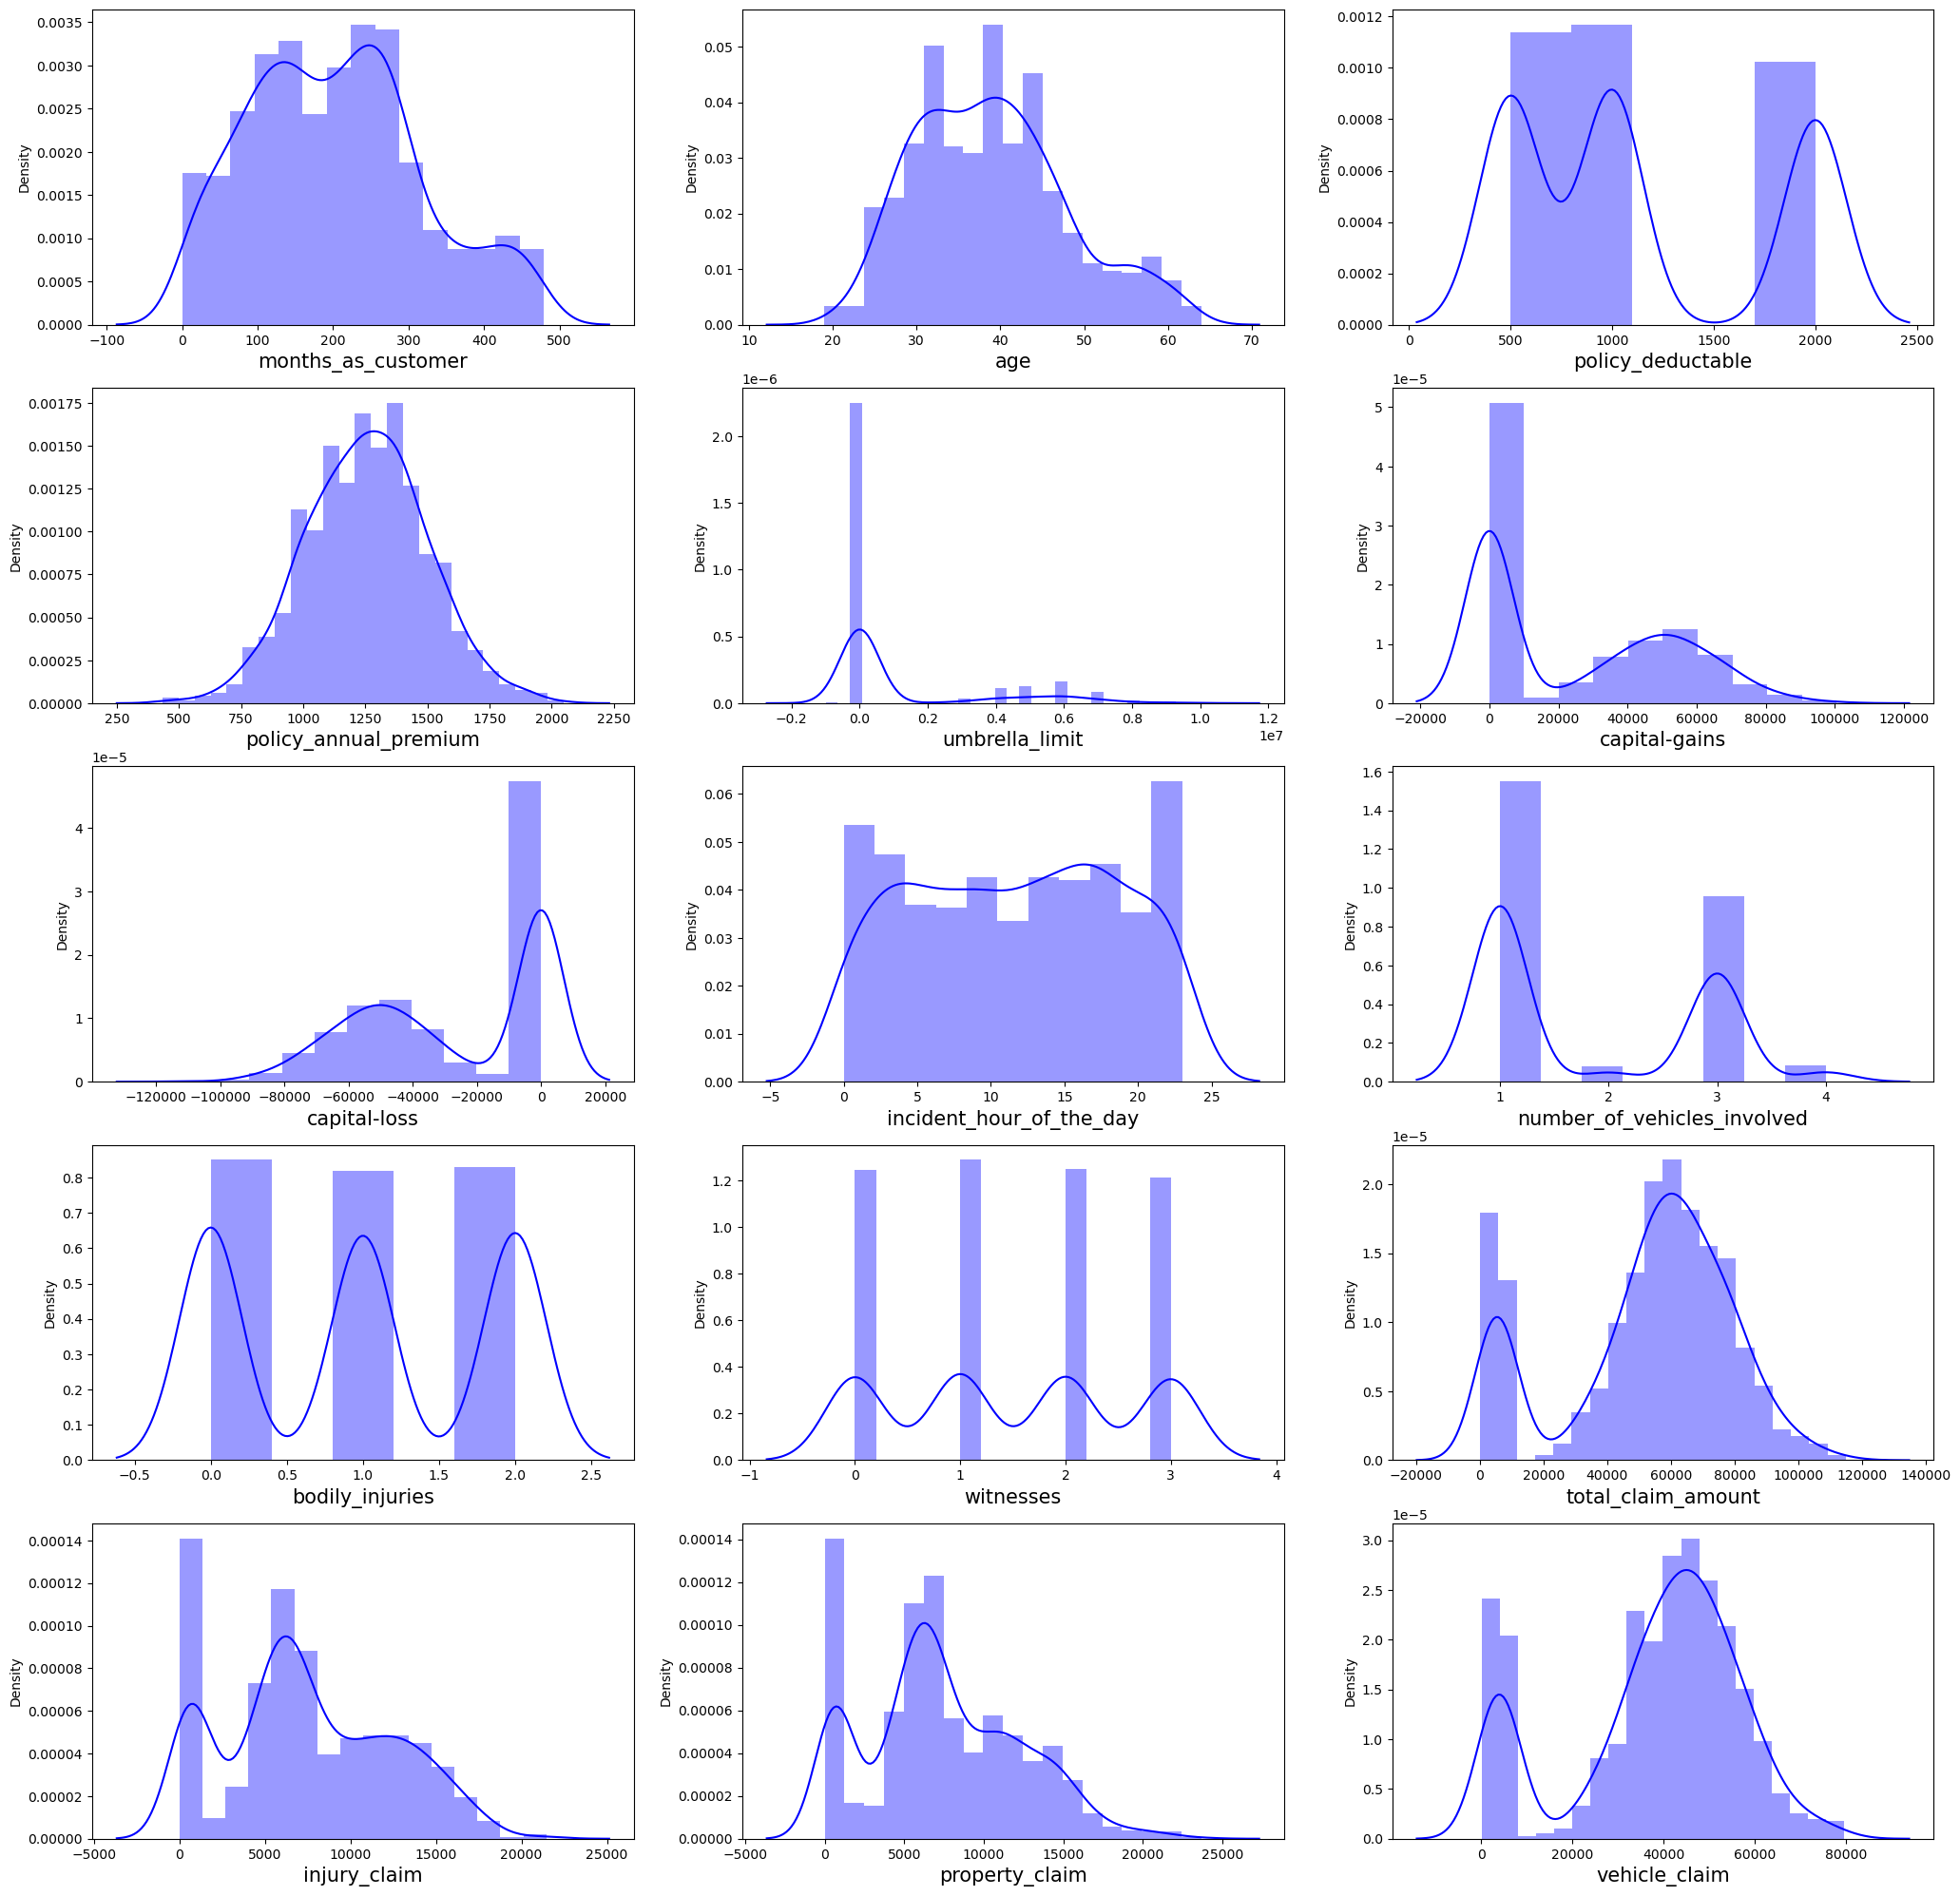

In [25]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber <= 15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From above we can see data is normally distributed in some columns, some columns have skewed data.  
The data is not normally distributed in some columns which suggest presence of outliers

### Visualizing the outliers using boxplot

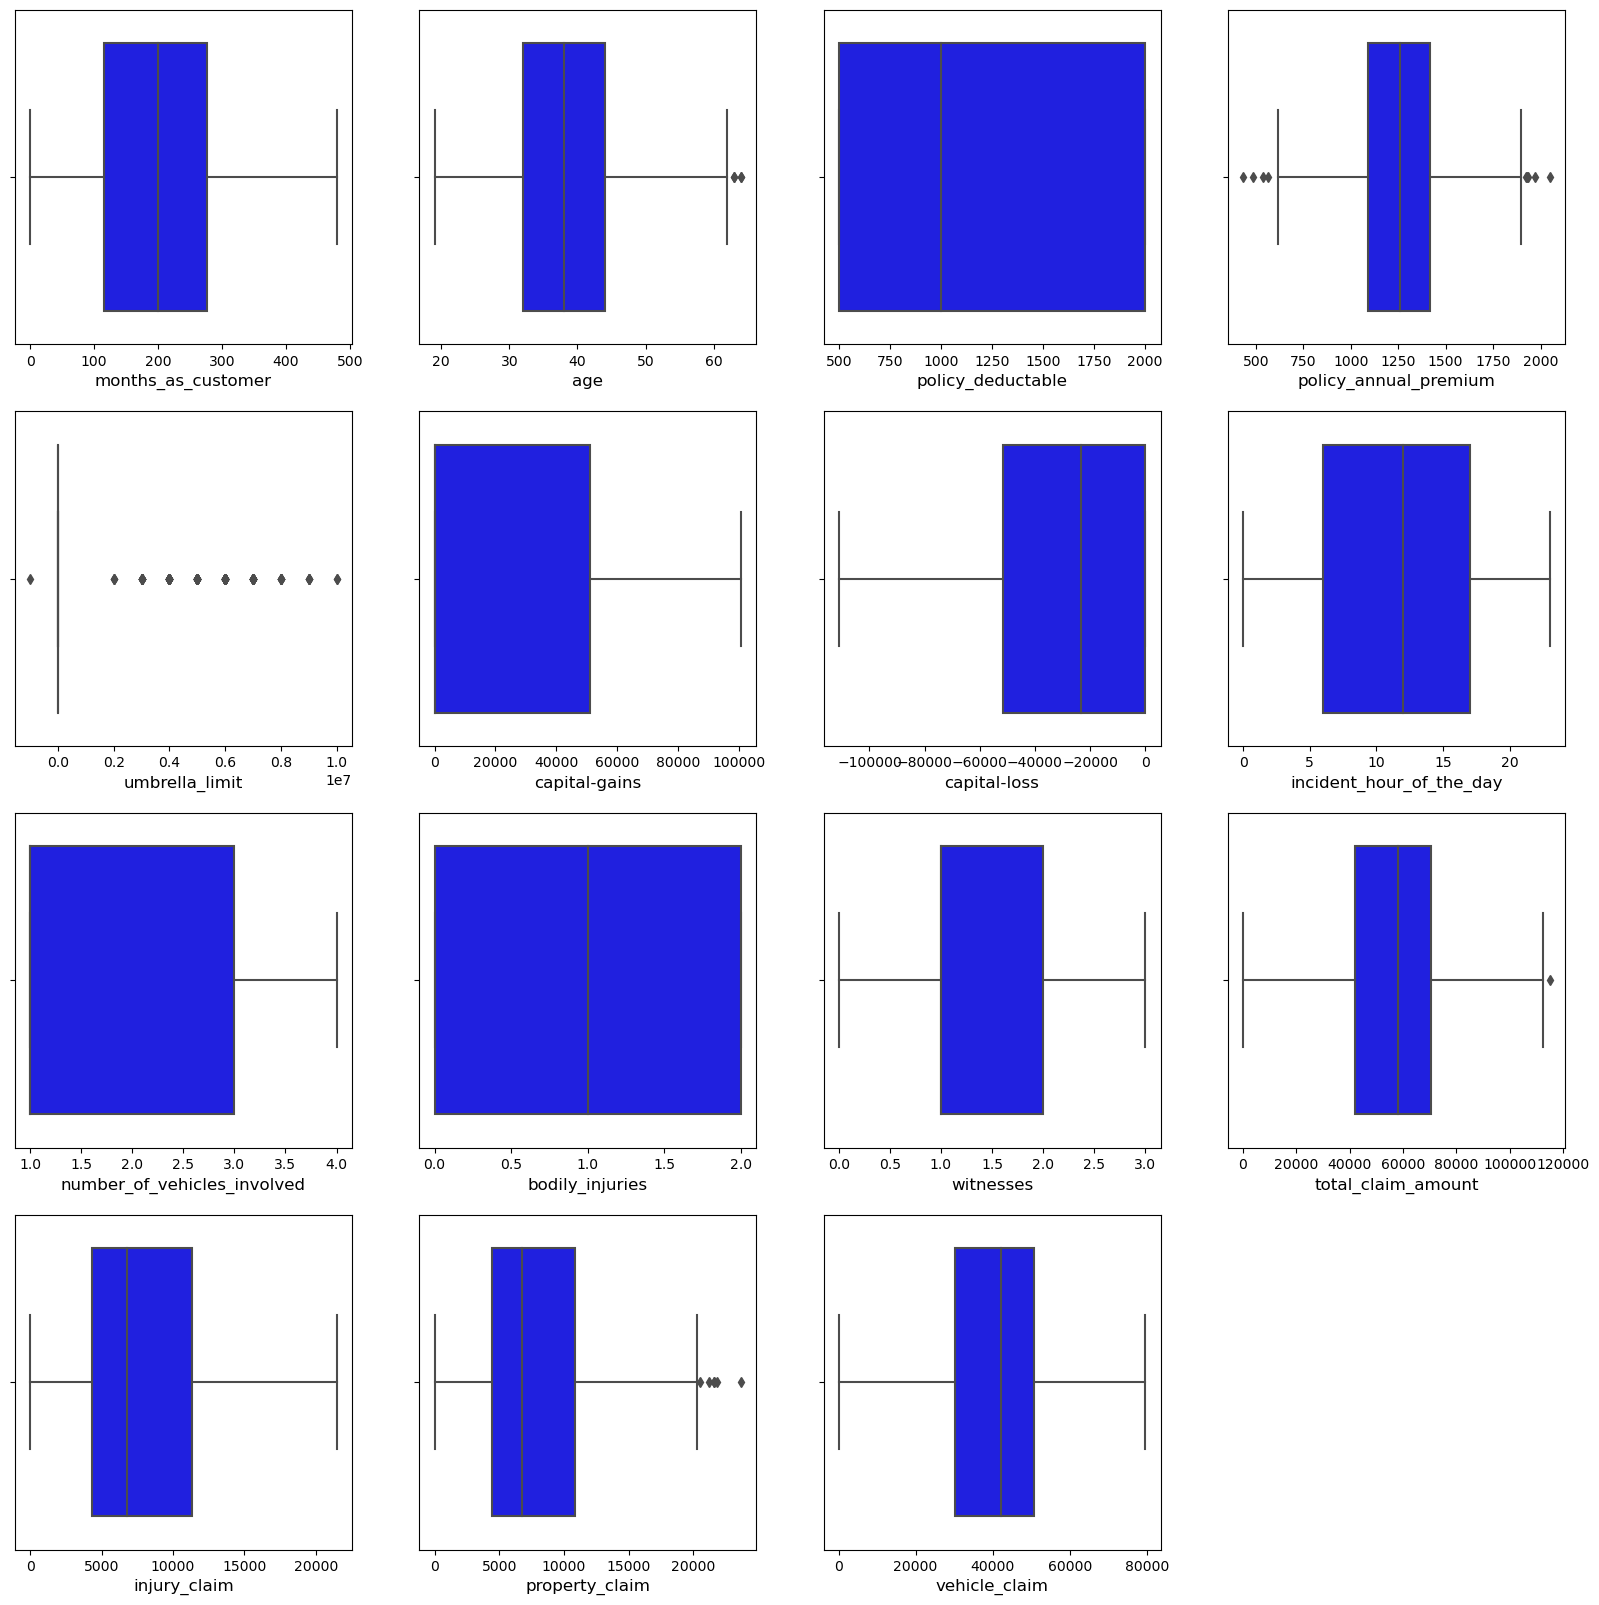

In [26]:
plt.figure(figsize=(20,20),facecolor='white')
graph=1
for column in num_col:
    if graph <= 15:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=12)
    graph+=1
plt.show()

In the boxplot we can notice the outliers present in some of the columns.
Let's remove outliers from the columns using Zscore method.

#### Removing outliers using z-score method

In [27]:
from scipy.stats import zscore
z=zscore(df[['age', 'policy_annual_premium', 'umbrella_limit', 'total_claim_amount', 'property_claim']])
abs_z=np.abs(z)
df=df[(abs_z<3).all(axis=1)]  #3-std deviation data
df.shape

(981, 30)

Previously it was (1000, 30)

#### Encoding the categorical columns

In [28]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,1,0,0,0,0,5070,780,780,3510,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,0,1,2,0,63400,6340,6340,50720,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,0,1,0,6500,1300,650,4550,0


### Correlation matrix using HeatMap

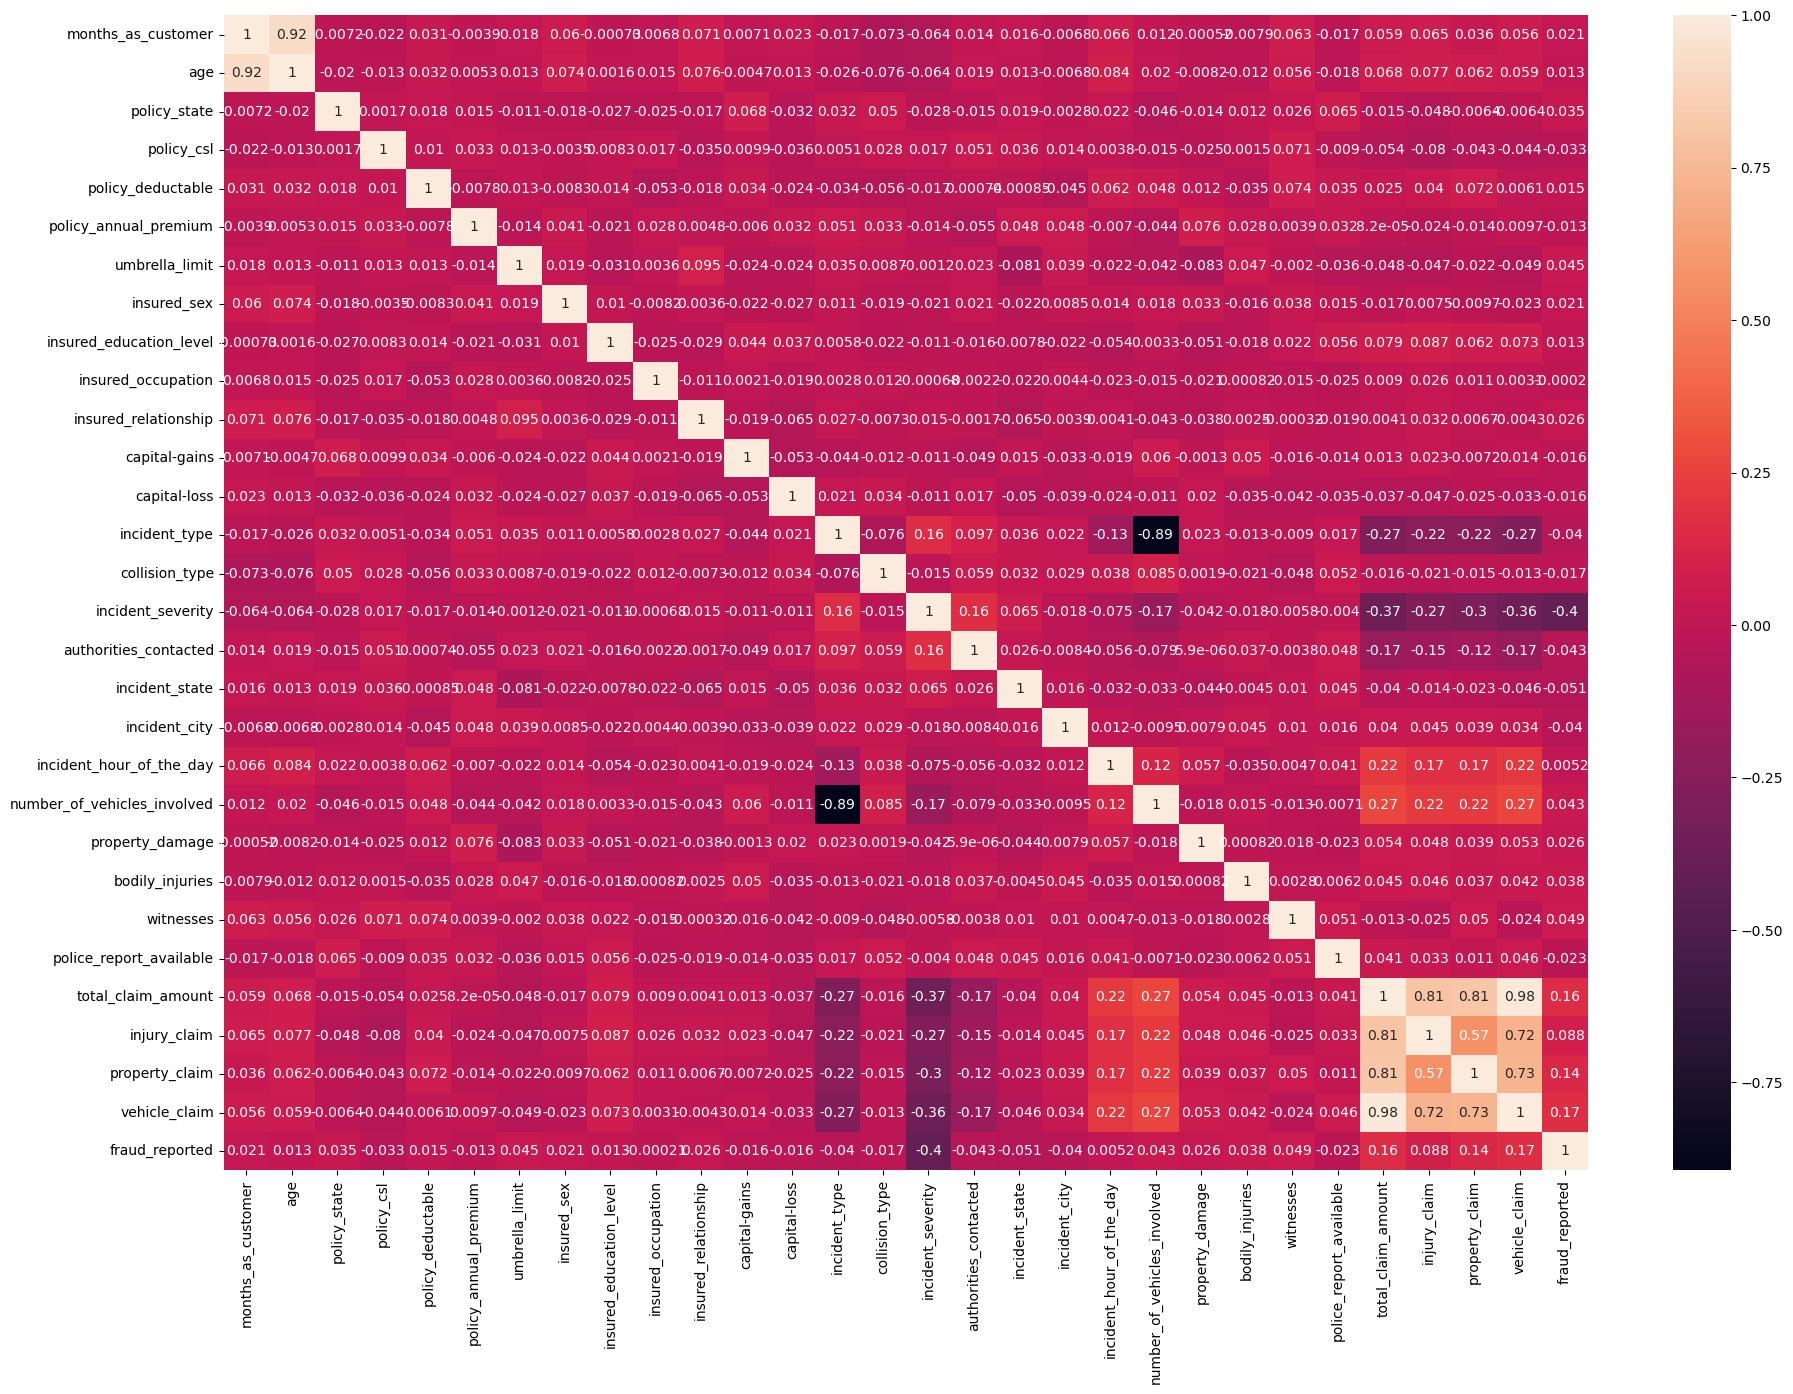

In [29]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the correlation matrix, we can see the co-relation between all the features and the features and targets.   
It seems to have multicolinearity issue. we will check it later.

### Visualizing the correlation between label and features using plot

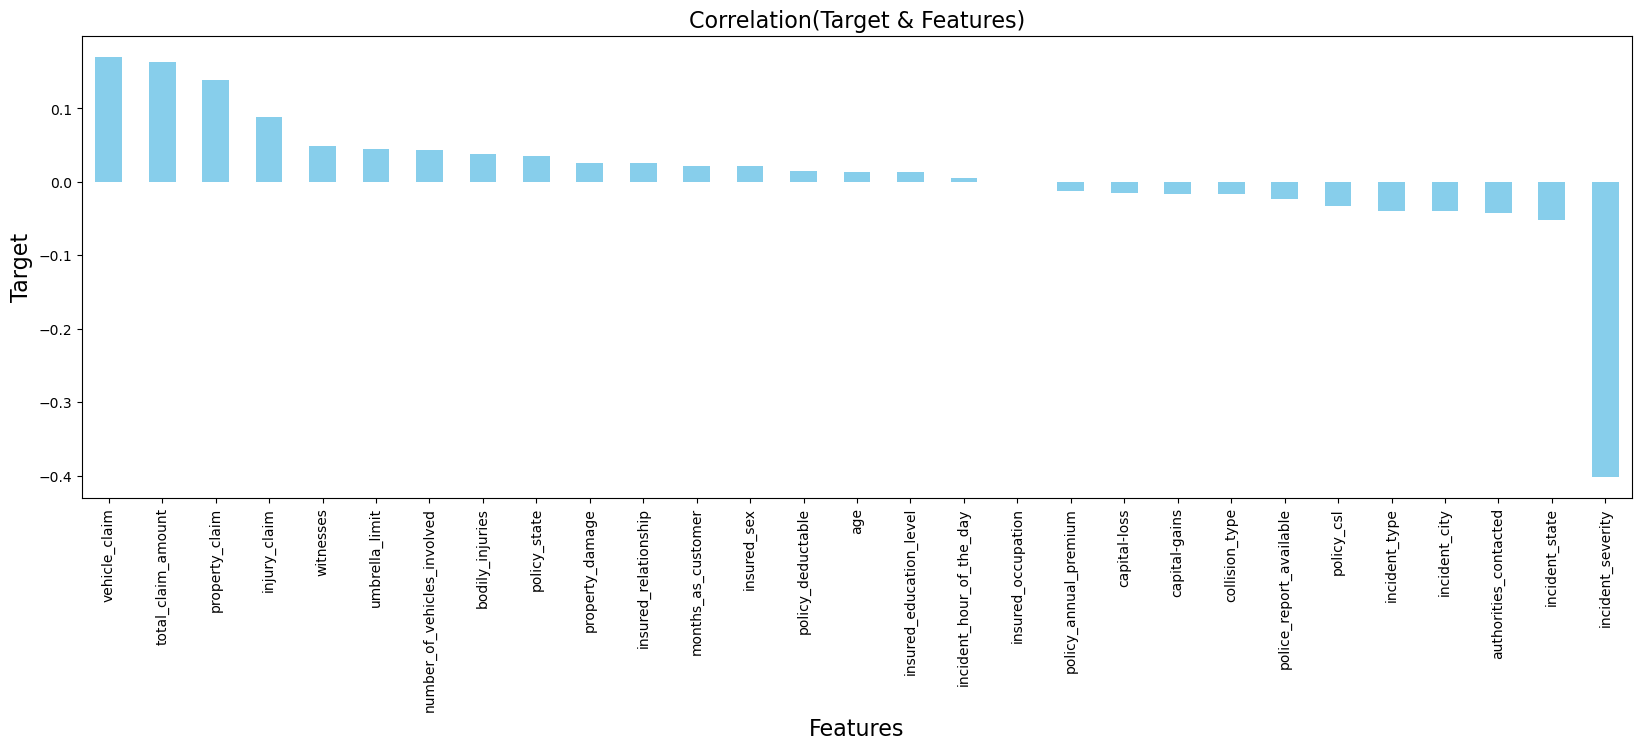

In [30]:
# visualization of target "Income" with other features in plots
plt.figure(figsize =(20, 6))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation(Target & Features)',fontsize=16)
plt.show()

From above plot we can see the positive and negative correlated features with the target "fraud_reported"

### Separating the features and target

In [31]:
x = df.drop(['fraud_reported'],axis=1)  #Features
y = df['fraud_reported']   #Target

### Data Scaling using Standard Scaler

In [32]:
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [33]:
x1.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.070264,0.983956,1.180447,0.067197,-0.225968,0.619923,-0.467587,1.072994,0.533151,-1.157117,...,-0.958407,-0.821125,1.513918,0.001248,0.464781,1.474706,0.717821,-0.188645,1.174939,0.753457
1,0.202991,0.329985,-0.024567,0.067197,1.410009,-0.248937,1.891997,1.072994,0.533151,-0.161169,...,-0.527848,-0.821125,-0.660538,-1.222563,-1.333838,-0.678101,-1.809969,-1.362026,-1.379994,-1.825887


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,6.862894,months_as_customer
1,6.898455,age
2,1.026537,policy_state
3,1.023181,policy_csl
4,1.037853,policy_deductable
5,1.030857,policy_annual_premium
6,1.036097,umbrella_limit
7,1.021377,insured_sex
8,1.030583,insured_education_level
9,1.011740,insured_occupation


From the above we can see that the last four column have multicolinearity issue here(vif_values>10).

In [35]:
# Dropping 'total_claim_amount' column
x1 = x1.drop(["total_claim_amount"],axis=1)
x1.shape

(981, 28)

In [36]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,6.862894,months_as_customer
1,6.898455,age
2,1.026537,policy_state
3,1.023181,policy_csl
4,1.037853,policy_deductable
5,1.030857,policy_annual_premium
6,1.036097,umbrella_limit
7,1.021377,insured_sex
8,1.030583,insured_education_level
9,1.011740,insured_occupation


Now we can see the multicolinearity issue has been resolved(all vif<10).

In [37]:
#checking of class imbalance of target variable
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

Here we can see the target class is imbalance.we need to balance it.

### Oversampling data using SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(x1,y)

In [39]:
#Now checking value count of target column
y1.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

### Splitting the dataset in Train and Test Set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.25, random_state=42)

## Model Building(Classification)

### Decision Tree Classifier

In [41]:
model1 = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=None)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
pred = model1.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model1, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 77%
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       174
           1       0.78      0.81      0.79       197

    accuracy                           0.77       371
   macro avg       0.77      0.77      0.77       371
weighted avg       0.77      0.77      0.77       371

Cross Validation Score: 0.7114731171656482
Difference between Accuracy Score and Cross Validation Score is 0.0621117884947292


### Logistic Regression

In [43]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [44]:
pred = model2.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model2, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 72%
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       174
           1       0.73      0.73      0.73       197

    accuracy                           0.72       371
   macro avg       0.72      0.72      0.72       371
weighted avg       0.72      0.72      0.72       371

Cross Validation Score: 0.7543250802859215
Difference between Accuracy Score and Cross Validation Score is -0.03734394821044984


### Random Forest Classifier

In [45]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
pred = model3.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(model3, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 88%
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       174
           1       0.90      0.88      0.89       197

    accuracy                           0.88       371
   macro avg       0.88      0.88      0.88       371
weighted avg       0.88      0.88      0.88       371

Cross Validation Score: 0.7706257122138196
Difference between Accuracy Score and Cross Validation Score is 0.1107759050368543


### XGBoost Classifier

In [47]:
Model4 = XGBClassifier()
Model4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
pred = Model4.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')
print('Classification Report :\n',classification_report(y_test,pred))

# Cross Validation Score
cv_score = (cross_val_score(Model4, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Model Accuracy : 86%
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       174
           1       0.88      0.85      0.87       197

    accuracy                           0.86       371
   macro avg       0.86      0.86      0.86       371
weighted avg       0.86      0.86      0.86       371

Cross Validation Score: 0.7756966746089299
Difference between Accuracy Score and Cross Validation Score is 0.08414160032368467


We can see all models are working well but I am taking Random Forest Classifier as our final model as it shows 88% accuracy and all other scores are also good.

### Hyper Parameter Tuning

In [49]:
#Random Forest Classifier

parameters = {'criterion':['entropy','gini'],
             'n_estimators':[20,30],
             'max_depth':[10,15],
             'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]
             }

In [51]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [52]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [20, 30]})

In [53]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 20}

In [54]:
Final_model=RandomForestClassifier(criterion = 'entropy',max_depth = 15,min_samples_leaf = 5,min_samples_split = 10,n_estimators = 20)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc*100))+'%')

Model Accuracy : 85%


In [55]:
# Cross Validation Score
cv_score = (cross_val_score(Final_model, x, y, cv=5).mean())
print("Cross Validation Score:", cv_score)
    
# Result of accuracy minus cv scores
result = acc - cv_score
print("Difference between Accuracy Score and Cross Validation Score is", result)

Cross Validation Score: 0.7737128353879623
Difference between Accuracy Score and Cross Validation Score is 0.07534376838562262


### ROC AUC Curve

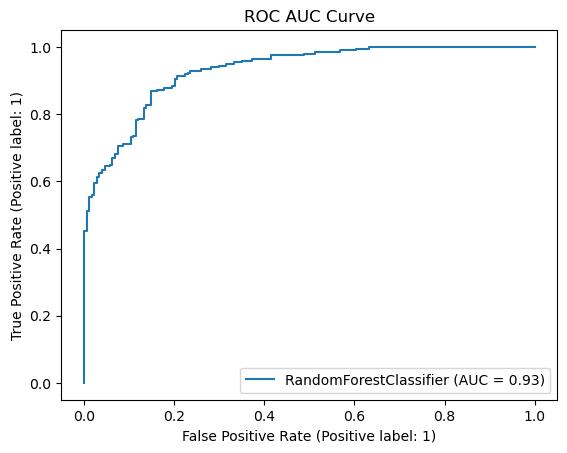

In [56]:
disp = metrics.plot_roc_curve(Final_model, x_test, y_test)
plt.title("ROC AUC Curve")
plt.show()

ROC Curve generated for final model and it shows the AUC score for final model is of 93%.

### Saving the model

In [57]:
import joblib
joblib.dump(Final_model,"Insurance Claim Fraud Detection Project analysis.pkl")

['Insurance Claim Fraud Detection Project analysis.pkl']